## 01. Import Libraries

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# This option ensures that the graphs we create are displayed within the notebook without the need to "call" them specifically
%matplotlib inline

## 02. Path Creation

In [14]:
data_path = r'/Users/renatabatista/Other Docs/Germany/CareerFoundry/Data Imersion/4. Python/26-05-2025 BR e-commerce'

## 03. Load Data

In [17]:
df = pd.read_csv(os.path.join(data_path, '02 Data', 'Prepared Data', 'check_merge_orders_full.csv'), index_col = False)

## 04. Data Cleaning

In [20]:
# Drop duplicate rows if any
print("Before dropping duplicates:", df.shape)
df.drop_duplicates(inplace=True)
print("After dropping duplicates:", df.shape)

Before dropping duplicates: (115706, 41)
After dropping duplicates: (115706, 41)


In [22]:
# Summary of missing values
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

review_comment_title             102126
review_comment_message            67617
product_category_name_english      1660
product_weight_g                   1638
product_length_cm                  1638
product_height_cm                  1638
product_width_cm                   1638
product_category_name              1637
product_description_lenght         1637
product_photos_qty                 1637
product_name_lenght                1637
review_score                        861
review_creation_date                861
review_answer_timestamp             861
review_id                           861
payment_value                         3
payment_installments                  3
payment_type                          3
payment_sequential                    3
dtype: int64

In [96]:
# Convert dates
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'], errors='coerce')
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'], errors='coerce')

# Create delivery delay column
df['delivery_delay_days'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days

# Drop rows with missing data
df_model = df[['price', 'delivery_delay_days']].dropna()

# Filter extreme values
df_model = df_model[(df_model['delivery_delay_days'] > -10) & (df_model['delivery_delay_days'] < 30)]

## 05 Visual Exploration

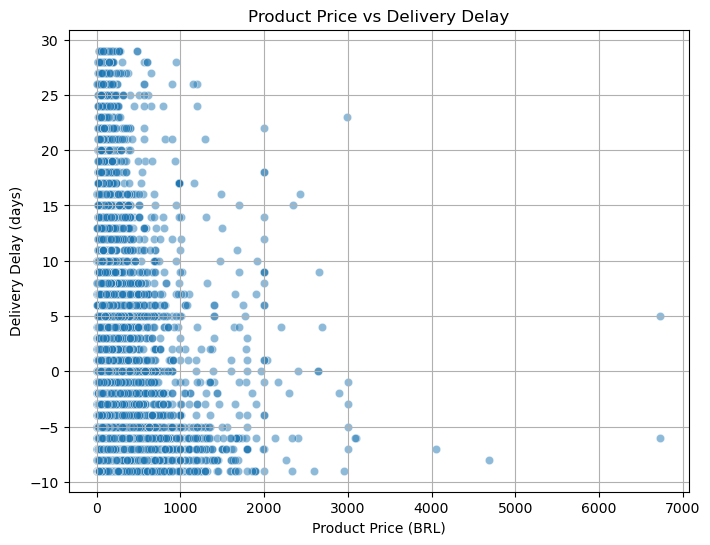

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_model, x='price', y='delivery_delay_days', alpha=0.5)
plt.title('Product Price vs Delivery Delay')
plt.xlabel('Product Price (BRL)')
plt.ylabel('Delivery Delay (days)')
plt.grid(True)
plt.show()

### Hypothesis
We hypothesize that higher product prices are associated with longer delivery delays.

- H₀: Product price has no impact on delivery delay.
- H₁: There is a significant relationship between price and delivery delay.


### What the plot shows:

#### X-axis: Product price in BRL (Brazilian reais).
#### Y-axis: Delivery delay in days — values above zero mean late delivery, values below zero mean early delivery.
##### Each point: Represents a single product order.

### Key Observations from the Plot

#### - No Strong Trend or Correlation
##### The points are widely scattered across all price ranges, with no clear upward or downward slope. This suggests that product price doesn't have a strong relationship with delivery delay.
#### - Most delays are clustered near zero
##### The majority of orders appear to have been delivered on time or slightly late, regardless of price. There's a visible density of points around delivery_delay_days = 0.
#### - Outliers are present
##### A few high-price products had significant delays, but this doesn’t represent a consistent pattern across all expensive items.
##### Similarly, some low-cost products had long delays, reinforcing the idea that price alone doesn't drive delivery performance.
#### Price range is skewed
##### Most of the data is clustered at lower price points, with a long tail of higher-priced items. This skew means the relationship might be harder to spot without transforming the price variable (e.g., log scale).

#### Based on the visual pattern:
##### There's little evidence of a linear relationship between product price and delivery delay.
##### This plot challenges the hypothesis that more expensive items take longer to deliver.


## 06. Prepare Data for Regression

In [32]:
# Reshape data
X = df_model[['price']].values  # Independent variable
y = df_model['delivery_delay_days'].values  # Dependent variable

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 07. Train the Model and Predict

In [35]:
# Train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)


## 08. Plot Regression Line

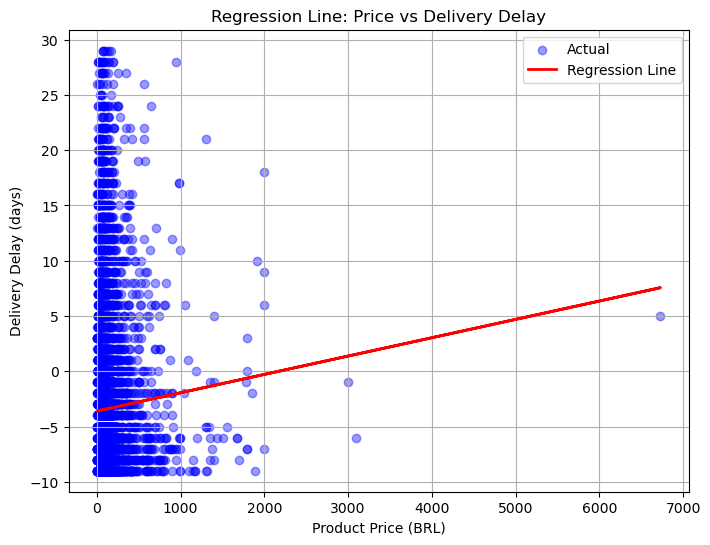

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.4, label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Product Price (BRL)')
plt.ylabel('Delivery Delay (days)')
plt.title('Regression Line: Price vs Delivery Delay')
plt.legend()
plt.grid(True)
plt.show()

## 09. Evaluate the Model

In [41]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 43.15
R² Score: 0.0025


## 10. Compared Actual vs. Predicted

In [44]:
compare_df = pd.DataFrame({
    'Actual Delay': y_test,
    'Predicted Delay': y_pred.round(2)
})
compare_df.head(10)

,Actual Delay,Predicted Delay
0,-6,-3.34
1,0,-3.59
2,20,-3.46
3,-9,-2.92
4,-6,-3.57
5,-7,-3.56
6,-7,-3.52
7,-7,-3.55
8,3,-3.55
9,-9,-3.39


## 11. Conclusions

In [94]:
### Interpretation

The model's R² score indicates [insert your actual value] of the variance in delivery delays can be explained by product price alone.

Given the low R² and visual scatter, it's likely that price is **not** a strong predictor of delivery delays. However, this gives us valuable insight: **delivery logistics are probably more dependent on product weight, seller distance, or regional infrastructure**.

### Reflections on Data Bias

- The dataset may exclude canceled or returned orders, introducing survivorship bias.
- Regional differences (urban vs rural) aren't accounted for here but could affect delivery time.
- Seller behavior or courier inefficiency could be untracked latent factors.

### Next Steps

- Include more predictors: freight_value, product_weight_g, seller zip code distance.
- Try classification: Predict whether an order is "on time" vs "late."

SyntaxError: unterminated string literal (detected at line 3) (3615479872.py, line 3)

In [100]:
df_model.dtypes

price                  float64
delivery_delay_days      int64
dtype: object